In [1]:
import pandas as pd

# Load the dataset
file_path = 'twitter_dataset.csv'
twitter_data = pd.read_csv(file_path)

# Count tweets containing the word 'sport'
sport_tweets_count = twitter_data['Text'].str.contains('sport', case=False).sum()

# Print the count
print(f"Number of tweets containing 'sport': {sport_tweets_count}")

# Make the entire dataset readable
pd.set_option('display.max_colwidth', None)
print(twitter_data[['Text']])

Number of tweets containing 'sport': 349
                                                                                                                                                                                                                                                                                      Text
0                                       Party least receive say or single. Prevent prevent husband affect. May himself cup style evening protect. Effect another themselves stage perform.\nPossible try tax share style television with. Successful much sell development economy effect.
1                                                                                          Hotel still Congress may member staff. Media draw buy fly. Identify on another turn minute would.\nLocal subject way believe which question some message. Own all imagine join agency indicate.
2                                                            Nice be her debate industry that year. Film where

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   10000 non-null  int64 
 1   Username   10000 non-null  object
 2   Text       10000 non-null  object
 3   Retweets   10000 non-null  int64 
 4   Likes      10000 non-null  int64 
 5   Timestamp  10000 non-null  object
dtypes: int64(3), object(3)
memory usage: 468.9+ KB
None


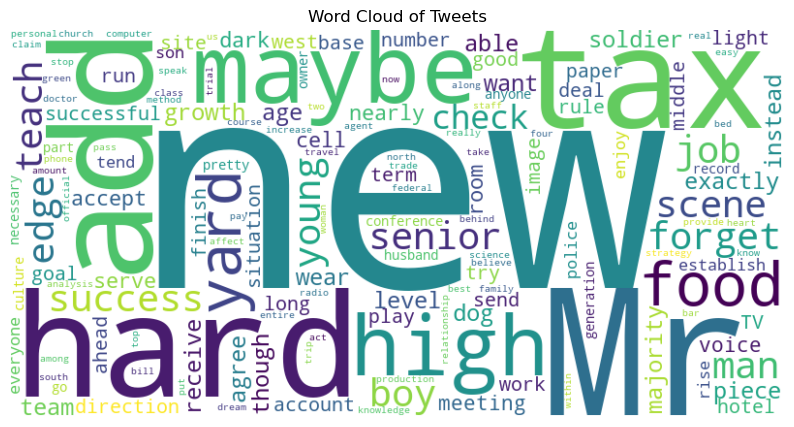

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the dataset
file_path = 'twitter_dataset.csv'
twitter_data = pd.read_csv(file_path)

# Display basic information about the dataset
print(twitter_data.info())

# Sample text analysis: Word Cloud
text_combined = ' '.join(twitter_data['Text'].astype(str))
wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(text_combined)

# Plot the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()

In [4]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import warnings

# Step 2: Load the dataset
file_path = 'twitter_dataset.csv'
twitter_data = pd.read_csv(file_path)

# Step 3: Create a 'Category' column based on the presence of 'sport'
twitter_data['Category'] = twitter_data['Text'].str.contains('sport', case=False).astype(int)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(twitter_data['Text'], twitter_data['Category'], test_size=0.2, random_state=42)

# Step 5: Text Categorization (Naive Bayes Classifier)
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Suppress warnings
warnings.filterwarnings("ignore")

classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Step 6: Evaluate the classifier
y_pred = classifier.predict(X_test_vectorized)

# Print the classification report
classification_result = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:\n", classification_result)
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1918
           1       1.00      0.00      0.00        82

    accuracy                           0.96      2000
   macro avg       0.98      0.50      0.49      2000
weighted avg       0.96      0.96      0.94      2000

Accuracy: 0.959
